<a href="https://colab.research.google.com/github/slowandfast/DiagRecommdSystem_01/blob/main/KJH_TextGCN_EMR%EA%B8%B0%EB%B0%98_%EC%A7%84%EB%8B%A8%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import requests

# BioPortal API 설정
api_key = 'b16afbe7-e973-473a-b04e-2d0b51ca63c1'
base_url = 'http://data.bioontology.org'
ontology = 'SNOMEDCT'

# 증상 용어 검색
query = 'fever'
url = f'{base_url}/search?q={query}&ontologies={ontology}&apikey={api_key}'

response = requests.get(url)
data = response.json()

# 결과 출력
for result in data['collection']:
    print(result['prefLabel'], '-', result['synonym'])

Fever - ['Fever (finding)', 'Febrile', 'Pyrexial', 'Pyrexia']
Paraneoplastic fever - ['Paraneoplastic fever (disorder)']
Trench fever - ['Fever due to Rochalimaea quintana', 'Five day fever', 'Fever due to Bartonella quintana', 'Wolhynian fever', 'Quintan fever', 'Febris quintata', 'Trench fever (disorder)']
Trivittatus fever - ['Trivittatus fever (disorder)']
Grain fever - ['Grain fever (disorder)']
Paratyphoid fever - ['Paratyphoid fever (disorder)']
Spiking fever - ['Spiking temperature', 'Spiking fever (finding)']
Isfahan fever - ['Isfahan fever (disorder)']
Postpartum fever - ['Postpartum fever (finding)']
Sepik fever - ['Sepik fever (disorder)']
Remittent fever - ['Remittent fever (finding)']
Prolonged fever - ['Prolonged fever (finding)']
Etiocholanolone fever - ['Etiocholanolone fever (disorder)']
Quartan fever - ['Quartan fever (finding)']
Intermittent fever - ['Intermittent fever (finding)', 'Periodic fever, not disease', 'Picket fence fever']
Malarial fever - ['Malarial feve

In [10]:
import pandas as pd
import requests

API_KEY = 'b16afbe7-e973-473a-b04e-2d0b51ca63c1'  # 실제 API 키로 대체하세요
BASE_URL = 'http://data.bioontology.org'
ONTOLOGY = 'SYMP'

# 예제 데이터 프레임
data = {
    'id': [1, 2, 3],
    'text': [
        "The patient was diagnosed with fever and cough.",
        "Symptoms include headache, dizziness, and nausea.",
        "The diagnosis was pneumonia and bronchitis."
    ]
}

df = pd.DataFrame(data)

def get_medical_terms(text, api_key=API_KEY, ontology=ONTOLOGY):
    headers = {
        'Authorization': f'apikey token={api_key}'
    }
    url = f"{BASE_URL}/annotator?text={requests.utils.quote(text)}&ontologies={ontology}"
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        results = response.json()
        terms = [result.get('annotatedClass', {}).get('prefLabel', 'No Label') for result in results]
        return terms
    else:
        print(f"Error: {response.status_code}, {response.text}")
        return []

# 데이터 프레임에서 의학 용어 추출
df['medical_terms'] = df['text'].apply(get_medical_terms)

print(df)

   id                                               text  \
0   1    The patient was diagnosed with fever and cough.   
1   2  Symptoms include headache, dizziness, and nausea.   
2   3        The diagnosis was pneumonia and bronchitis.   

                    medical_terms  
0            [No Label, No Label]  
1  [No Label, No Label, No Label]  
2                      [No Label]  


In [13]:
import requests

def get_symptoms():
    api_key = 'b16afbe7-e973-473a-b04e-2d0b51ca63c1'  # 본인의 API 키를 넣어주세요.
    ontology = 'SYMP'  # 사용할 온톨로지 약어
    url = f'http://data.bioontology.org/ontologies/{ontology}/classes'

    params = {
        'apikey': api_key,
        'include': 'prefLabel'
    }

    response = requests.get(url, params=params)
    if response.status_code == 200:
        try:
            print(response.json())
            symptoms = [concept['prefLabel'] for concept in response.json()]
            return symptoms
        except TypeError as e:
            print("Error: Invalid JSON data format.")
            print(e)
            return []
    else:
        print(f"Error: {response.status_code}")
        return []

symptoms = get_symptoms()
print(symptoms)

{'page': 1, 'pageCount': 21, 'totalCount': 1019, 'prevPage': None, 'nextPage': 2, 'links': {'nextPage': 'https://data.bioontology.org/ontologies/SYMP/classes?apikey=b16afbe7-e973-473a-b04e-2d0b51ca63c1&include=prefLabel&display=prefLabel&page=2', 'prevPage': None}, 'collection': [{'prefLabel': 'neck pain', '@id': 'http://purl.obolibrary.org/obo/SYMP_0000829', '@type': 'http://www.w3.org/2002/07/owl#Class', 'links': {'self': 'https://data.bioontology.org/ontologies/SYMP/classes/http%3A%2F%2Fpurl.obolibrary.org%2Fobo%2FSYMP_0000829', 'ontology': 'https://data.bioontology.org/ontologies/SYMP', 'children': 'https://data.bioontology.org/ontologies/SYMP/classes/http%3A%2F%2Fpurl.obolibrary.org%2Fobo%2FSYMP_0000829/children', 'parents': 'https://data.bioontology.org/ontologies/SYMP/classes/http%3A%2F%2Fpurl.obolibrary.org%2Fobo%2FSYMP_0000829/parents', 'descendants': 'https://data.bioontology.org/ontologies/SYMP/classes/http%3A%2F%2Fpurl.obolibrary.org%2Fobo%2FSYMP_0000829/descendants', 'ance

In [1]:
!pip3 install torch
!pip3 install torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 2.5 MB/s eta 0:00:00
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 MB 4.1 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 2.1.0
    Uninstalling triton-2.1.0:
      Successfully uninstalled triton-2.1.0
  Attempting uninstall: nvidia-nccl-cu12
    Found existing installation: nvidia-nccl-cu12 2.18.1
    Uninstalling nvidia-nccl-cu12-2.18.1:
      Successfully uninstalled nvidia-nccl-cu12-2.18.1
  Attempting uninstall: torch
    Found existing installation: torch 2.1.0
    Uninstalling torch-2.1.0:
      Successfully uninstalled torch-2.1.0


In [4]:
print("Torch version:{}".format(torch.__version__))
print("cuda version: {}".format(torch.version.cuda))
print("cudnn version:{}".format(torch.backends.cudnn.version()))

Torch version:2.3.0+cu121
cuda version: 12.1
cudnn version:8902


In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# 예시 텍스트 데이터
texts = ["I like to eat apples.", "Apples are tasty fruits.", "Bananas are also fruits.", "I prefer bananas over apples."]

# 문장 간의 유사도를 기준으로 그래프를 생성하는 함수
def construct_graph(texts):
    G = nx.Graph()  # 무방향 그래프 생성

    # 각 문장을 노드로 추가
    for i, text in enumerate(texts):
        G.add_node(i, text=text)

    # 문장 간의 유사도를 기준으로 엣지를 추가
    for i in range(len(texts)):
        for j in range(i + 1, len(texts)):
            similarity = compute_similarity(texts[i], texts[j])
            if similarity > threshold:  # 임계값 이상의 유사도를 가지는 경우에만 엣지 추가
                G.add_edge(i, j, weight=similarity)

    return G

# 두 문장 사이의 유사도를 계산하는 함수 (예시로 간단하게 코사인 유사도 사용)
def compute_similarity(text1, text2):
    # 예시로 간단하게 코사인 유사도 계산
    return 0.5  # 임의의 유사도 값

# 그래프 생성
threshold = 0.3  # 유사도 임계값
G = construct_graph(texts)

# 그래프 정보 확인
print("Nodes of graph:", G.nodes())
print("Edges of graph:", G.edges(data=True))

Nodes of graph: [0, 1, 2, 3]
Edges of graph: [(0, 1, {'weight': 0.5}), (0, 2, {'weight': 0.5}), (0, 3, {'weight': 0.5}), (1, 2, {'weight': 0.5}), (1, 3, {'weight': 0.5}), (2, 3, {'weight': 0.5})]


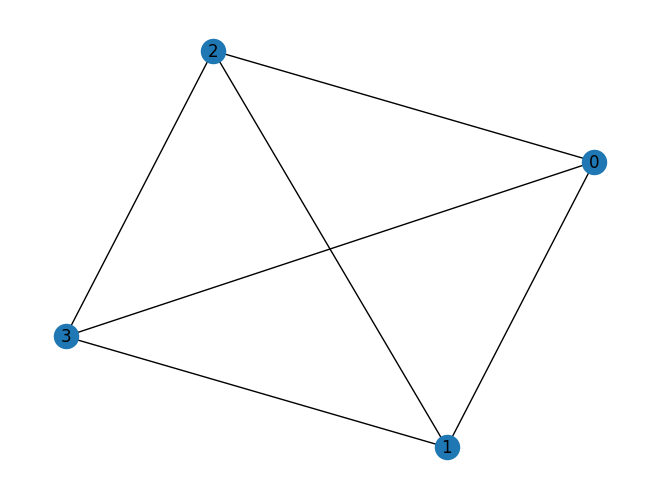

In [9]:
# 그래프 시각화
nx.draw(G, with_labels=True)
plt.show()

=====================================================================
각 텍스트를 노드로 하는 이진분류
=====================================================================

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.sparse import coo_matrix
import nltk
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import re

In [2]:
file_path = '/content/translated_ds.xlsx'

# selected_columns = ['ICD10', 'transstr']
selected_columns = ['ICD10', 'CC_translated', 'PI_translated']
df = pd.read_excel(file_path, usecols=selected_columns, dtype=str)

df['ICD10'] = df['ICD10'].astype(str)
df['CC_translated'] = df['CC_translated'].astype(str)
df['PI_translated'] = df['PI_translated'].astype(str)

print('전체 데이터 수 :', len(df))
df.head(10)

전체 데이터 수 : 826


,ICD10,PI_translated,CC_translated
0,N391,115-61-61 2023.5.10.Suspicion of proteinuria i...,nan
1,N184,"130/61/69 Symptoms (-), edema (-), urbanic sym...","CKD4, Cr 2.26, eGFR 29ml/min"
2,N184,"153/75/85 osophy (-), edema (-), urinary sympt...",CKD4
3,N185,148/90/64 Idema Mild CKD D/T ADPKD has been tr...,"Cr 3.74, eGFR 13.56"
4,N183,"Hello teacher, I am a patient who is being hos...",lab abnormality
5,N184,# R/O AKI # R/O AKI on CKD has never been diag...,lab abnormality
6,N184,The patient is a patient of 85 years old (F) c...,lab abnormality
7,N029,Hematurous Cystitis frequently occurs when che...,hematuria
8,N184,# T2DM (2017.) # HTN (2018.) # BPH # S/P spina...,CKD f/u
9,N183,"2023.06 AKI D/T HTN, HEAVY ALCOHOLICS HD #One ...",azotemia


In [3]:
def combine_2rd_columns(col_1, col_2):
    if not col_1:
        result = col_1
    else:
        result = ''

    if not pd.isna(col_2):
        result += " " + str(col_2)
    return result

df["record"] = df.apply(lambda x: combine_2rd_columns(x['CC_translated'], x['PI_translated']), axis=1)

In [4]:
df.head(10)

,ICD10,PI_translated,CC_translated,record
0,N391,115-61-61 2023.5.10.Suspicion of proteinuria i...,nan,115-61-61 2023.5.10.Suspicion of proteinuria ...
1,N184,"130/61/69 Symptoms (-), edema (-), urbanic sym...","CKD4, Cr 2.26, eGFR 29ml/min","130/61/69 Symptoms (-), edema (-), urbanic sy..."
2,N184,"153/75/85 osophy (-), edema (-), urinary sympt...",CKD4,"153/75/85 osophy (-), edema (-), urinary symp..."
3,N185,148/90/64 Idema Mild CKD D/T ADPKD has been tr...,"Cr 3.74, eGFR 13.56",148/90/64 Idema Mild CKD D/T ADPKD has been t...
4,N183,"Hello teacher, I am a patient who is being hos...",lab abnormality,"Hello teacher, I am a patient who is being ho..."
5,N184,# R/O AKI # R/O AKI on CKD has never been diag...,lab abnormality,# R/O AKI # R/O AKI on CKD has never been dia...
6,N184,The patient is a patient of 85 years old (F) c...,lab abnormality,The patient is a patient of 85 years old (F) ...
7,N029,Hematurous Cystitis frequently occurs when che...,hematuria,Hematurous Cystitis frequently occurs when ch...
8,N184,# T2DM (2017.) # HTN (2018.) # BPH # S/P spina...,CKD f/u,# T2DM (2017.) # HTN (2018.) # BPH # S/P spin...
9,N183,"2023.06 AKI D/T HTN, HEAVY ALCOHOLICS HD #One ...",azotemia,"2023.06 AKI D/T HTN, HEAVY ALCOHOLICS HD #One..."


In [5]:
# labels 컬럼 생성
df['labels'] = df['ICD10'].apply(lambda x: 1 if x in ['N182', 'N183', 'N184', 'N185'] else 0)

In [6]:
df.head(10)

,ICD10,PI_translated,CC_translated,record,labels
0,N391,115-61-61 2023.5.10.Suspicion of proteinuria i...,nan,115-61-61 2023.5.10.Suspicion of proteinuria ...,0
1,N184,"130/61/69 Symptoms (-), edema (-), urbanic sym...","CKD4, Cr 2.26, eGFR 29ml/min","130/61/69 Symptoms (-), edema (-), urbanic sy...",1
2,N184,"153/75/85 osophy (-), edema (-), urinary sympt...",CKD4,"153/75/85 osophy (-), edema (-), urinary symp...",1
3,N185,148/90/64 Idema Mild CKD D/T ADPKD has been tr...,"Cr 3.74, eGFR 13.56",148/90/64 Idema Mild CKD D/T ADPKD has been t...,1
4,N183,"Hello teacher, I am a patient who is being hos...",lab abnormality,"Hello teacher, I am a patient who is being ho...",1
5,N184,# R/O AKI # R/O AKI on CKD has never been diag...,lab abnormality,# R/O AKI # R/O AKI on CKD has never been dia...,1
6,N184,The patient is a patient of 85 years old (F) c...,lab abnormality,The patient is a patient of 85 years old (F) ...,1
7,N029,Hematurous Cystitis frequently occurs when che...,hematuria,Hematurous Cystitis frequently occurs when ch...,0
8,N184,# T2DM (2017.) # HTN (2018.) # BPH # S/P spina...,CKD f/u,# T2DM (2017.) # HTN (2018.) # BPH # S/P spin...,1
9,N183,"2023.06 AKI D/T HTN, HEAVY ALCOHOLICS HD #One ...",azotemia,"2023.06 AKI D/T HTN, HEAVY ALCOHOLICS HD #One...",1


In [7]:
# NLTK에서 필요한 자원 다운로드
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [8]:
# 영문만 추출하는 함수
def extract_english(text):
    english_words = re.findall(r'\b[a-zA-Z]+\b', text)
    return ' '.join(english_words)

# 품사 태깅 및 명사, 형용사, 동사 추출 함수
def extract_pos_tags(text):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    tagged_words = pos_tag(tokens)
    filtered_words = [word for word, pos in tagged_words if pos.startswith('N') or pos.startswith('J') or pos.startswith('V')]
    return ' '.join(filtered_words)

# 텍스트의 영문만 추출하여 업데이트
df['record'] = df['record'].apply(extract_english)

# 영문 텍스트의 품사 태깅 및 추출된 단어들로 업데이트
df['filtered_record'] = df['record'].apply(extract_pos_tags)

print(df)

    ICD10                                      PI_translated  \
0    N391  115-61-61 2023.5.10.Suspicion of proteinuria i...   
1    N184  130/61/69 Symptoms (-), edema (-), urbanic sym...   
2    N184  153/75/85 osophy (-), edema (-), urinary sympt...   
3    N185  148/90/64 Idema Mild CKD D/T ADPKD has been tr...   
4    N183  Hello teacher, I am a patient who is being hos...   
..    ...                                                ...   
821  N183  136/73-73 23.02 EDEMA occurs after shoulder su...   
822  N184  The patient is a diagnostic [DJD] patient of 8...   
823  N185  KONOS Registration HD 3 times a week, gold at ...   
824  R601  He has been edema two months ago.Urine comes o...   
825  N185  Start at CAPD Yeungnam University in 2021 ESKD...   

                    CC_translated  \
0                             nan   
1    CKD4, Cr 2.26, eGFR 29ml/min   
2                            CKD4   
3             Cr 3.74, eGFR 13.56   
4                 lab abnormality   
..       

In [9]:
df.head(10)

,ICD10,PI_translated,CC_translated,record,labels,filtered_record
0,N391,115-61-61 2023.5.10.Suspicion of proteinuria i...,nan,Suspicion of proteinuria in check up bubble ur...,0,Suspicion proteinuria check bubble urine inspe...
1,N184,"130/61/69 Symptoms (-), edema (-), urbanic sym...","CKD4, Cr 2.26, eGFR 29ml/min",Symptoms edema urbanic symptoms doe Known htn ...,1,Symptoms edema urbanic symptoms doe Known htn ...
2,N184,"153/75/85 osophy (-), edema (-), urinary sympt...",CKD4,osophy edema urinary symptom doe Known dm htn ...,1,osophy edema urinary symptom doe Known dm htn ...
3,N185,148/90/64 Idema Mild CKD D/T ADPKD has been tr...,"Cr 3.74, eGFR 13.56",Idema Mild CKD D T ADPKD has been treated with...,1,Idema Mild CKD D T ADPKD has been treated Fati...
4,N183,"Hello teacher, I am a patient who is being hos...",lab abnormality,Hello teacher I am a patient who is being hosp...,1,Hello teacher am patient is being hospitalized...
5,N184,# R/O AKI # R/O AKI on CKD has never been diag...,lab abnormality,R O AKI R O AKI on CKD has never been diagnose...,1,R O AKI R O AKI CKD has been diagnosed kidney ...
6,N184,The patient is a patient of 85 years old (F) c...,lab abnormality,The patient is a patient of years old F curren...,1,patient is patient years old F being treated d...
7,N029,Hematurous Cystitis frequently occurs when che...,hematuria,Hematurous Cystitis frequently occurs when che...,0,Hematurous Cystitis occurs checking few years ...
8,N184,# T2DM (2017.) # HTN (2018.) # BPH # S/P spina...,CKD f/u,HTN BPH S P spinal stenosis I have never seen ...,1,HTN BPH S P spinal stenosis have seen former K...
9,N183,"2023.06 AKI D/T HTN, HEAVY ALCOHOLICS HD #One ...",azotemia,AKI D T HTN HEAVY ALCOHOLICS HD One time after...,1,AKI D T HTN HEAVY ALCOHOLICS HD One time HD ti...


In [30]:
#  Preprocess train dataset
# remove special characters from text column
df.filtered_record = df.filtered_record.str.replace('[#,@,&]', '')
# Remove digits
df.filtered_record = df.filtered_record.str.replace('\d*','')
#Remove www
df.filtered_record = df.filtered_record.str.replace('w{3}','')
# remove urls
df.filtered_record = df.filtered_record.str.replace("http\S+", "")
# remove multiple spaces with single space
df.filtered_record = df.filtered_record.str.replace('\s+', ' ')
#remove all single characters
df.filtered_record = df.filtered_record.str.replace(r'\b\w\b', '')
# 여러번 반복되는 문자 하나만 표현
df.filtered_record = df.filtered_record.str.replace('=+', ' ')

In [31]:
df.head(10)

,ICD10,PI_translated,CC_translated,record,labels,filtered_record
0,N391,115-61-61 2023.5.10.Suspicion of proteinuria i...,nan,Suspicion of proteinuria in check up bubble ur...,0,Suspicion proteinuria check bubble urine inspe...
1,N184,"130/61/69 Symptoms (-), edema (-), urbanic sym...","CKD4, Cr 2.26, eGFR 29ml/min",Symptoms edema urbanic symptoms doe Known htn ...,1,Symptoms edema urbanic symptoms doe Known htn ...
2,N184,"153/75/85 osophy (-), edema (-), urinary sympt...",CKD4,osophy edema urinary symptom doe Known dm htn ...,1,osophy edema urinary symptom doe Known dm htn ...
3,N185,148/90/64 Idema Mild CKD D/T ADPKD has been tr...,"Cr 3.74, eGFR 13.56",Idema Mild CKD D T ADPKD has been treated with...,1,Idema Mild CKD D T ADPKD has been treated Fati...
4,N183,"Hello teacher, I am a patient who is being hos...",lab abnormality,Hello teacher I am a patient who is being hosp...,1,Hello teacher am patient is being hospitalized...
5,N184,# R/O AKI # R/O AKI on CKD has never been diag...,lab abnormality,R O AKI R O AKI on CKD has never been diagnose...,1,R O AKI R O AKI CKD has been diagnosed kidney ...
6,N184,The patient is a patient of 85 years old (F) c...,lab abnormality,The patient is a patient of years old F curren...,1,patient is patient years old F being treated d...
7,N029,Hematurous Cystitis frequently occurs when che...,hematuria,Hematurous Cystitis frequently occurs when che...,0,Hematurous Cystitis occurs checking few years ...
8,N184,# T2DM (2017.) # HTN (2018.) # BPH # S/P spina...,CKD f/u,HTN BPH S P spinal stenosis I have never seen ...,1,HTN BPH S P spinal stenosis have seen former K...
9,N183,"2023.06 AKI D/T HTN, HEAVY ALCOHOLICS HD #One ...",azotemia,AKI D T HTN HEAVY ALCOHOLICS HD One time after...,1,AKI D T HTN HEAVY ALCOHOLICS HD One time HD ti...


In [32]:
# 정규식을 사용하여 단어 길이가 1인 단어를 제거하는 함수
def remove_single_char_words(text):
    return ' '.join([word for word in text.split() if len(word) > 1])

# 데이터프레임의 a 컬럼에 함수 적용하여 단어 길이가 1인 단어 제거
df['filtered_record'] = df['filtered_record'].apply(remove_single_char_words)

In [33]:
df.head(10)

,ICD10,PI_translated,CC_translated,record,labels,filtered_record
0,N391,115-61-61 2023.5.10.Suspicion of proteinuria i...,nan,Suspicion of proteinuria in check up bubble ur...,0,Suspicion proteinuria check bubble urine inspe...
1,N184,"130/61/69 Symptoms (-), edema (-), urbanic sym...","CKD4, Cr 2.26, eGFR 29ml/min",Symptoms edema urbanic symptoms doe Known htn ...,1,Symptoms edema urbanic symptoms doe Known htn ...
2,N184,"153/75/85 osophy (-), edema (-), urinary sympt...",CKD4,osophy edema urinary symptom doe Known dm htn ...,1,osophy edema urinary symptom doe Known dm htn ...
3,N185,148/90/64 Idema Mild CKD D/T ADPKD has been tr...,"Cr 3.74, eGFR 13.56",Idema Mild CKD D T ADPKD has been treated with...,1,Idema Mild CKD ADPKD has been treated Fatima d...
4,N183,"Hello teacher, I am a patient who is being hos...",lab abnormality,Hello teacher I am a patient who is being hosp...,1,Hello teacher am patient is being hospitalized...
5,N184,# R/O AKI # R/O AKI on CKD has never been diag...,lab abnormality,R O AKI R O AKI on CKD has never been diagnose...,1,AKI AKI CKD has been diagnosed kidney disease ...
6,N184,The patient is a patient of 85 years old (F) c...,lab abnormality,The patient is a patient of years old F curren...,1,patient is patient years old being treated dia...
7,N029,Hematurous Cystitis frequently occurs when che...,hematuria,Hematurous Cystitis frequently occurs when che...,0,Hematurous Cystitis occurs checking few years ...
8,N184,# T2DM (2017.) # HTN (2018.) # BPH # S/P spina...,CKD f/u,HTN BPH S P spinal stenosis I have never seen ...,1,HTN BPH spinal stenosis have seen former Kidne...
9,N183,"2023.06 AKI D/T HTN, HEAVY ALCOHOLICS HD #One ...",azotemia,AKI D T HTN HEAVY ALCOHOLICS HD One time after...,1,AKI HTN HEAVY ALCOHOLICS HD One time HD time C...


In [ ]:
# 예시 텍스트 데이터
# texts = ["I like to eat apples.", "Apples are tasty fruits.", "Bananas are also fruits.", "I prefer bananas over apples."]
# labels = [1, 0, 0, 1]  # 각 텍스트 데이터의 클래스 레이블 (예: 1: 과일, 0: 과일이 아님)

In [ ]:
# 문장 간의 유사도를 기준으로 그래프를 생성하는 함수
def construct_graph(texts):
    G = nx.Graph()  # 무방향 그래프 생성

    # 각 문장을 노드로 추가
    for i, text in enumerate(texts):
        G.add_node(i, text=text)

    # 문장 간의 유사도를 기준으로 엣지를 추가
    for i in range(len(texts)):
        for j in range(i + 1, len(texts)):
            similarity = compute_similarity(texts[i], texts[j])
            if similarity > threshold:  # 임계값 이상의 유사도를 가지는 경우에만 엣지 추가
                G.add_edge(i, j, weight=similarity)

    return G

# 두 문장 사이의 유사도를 계산하는 함수 (예시로 간단하게 코사인 유사도 사용)
def compute_similarity(text1, text2):
    # 예시로 간단하게 코사인 유사도 계산
    return 0.5  # 임의의 유사도 값

# 그래프 생성
threshold = 0.3  # 유사도 임계값
G = construct_graph(texts)

# 그래프를 이진 분류하기 위한 데이터셋 생성
adj = nx.linalg.graphmatrix.adjacency_matrix(G)
X = adj.toarray()  # 인접 행렬로 변환
y = np.array(labels)

In [ ]:
# 학습 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Induct-GCN 모델 정의
class InductGCN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(InductGCN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 모델 초기화
input_dim = X_train.shape[1]
hidden_dim = 16
output_dim = 1
model = InductGCN(input_dim, hidden_dim, output_dim)

# 손실 함수 및 옵티마이저 설정
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
# 모델 학습
for epoch in range(100):
    optimizer.zero_grad()
    outputs = model(torch.FloatTensor(X_train))
    loss = criterion(outputs.squeeze(), torch.FloatTensor(y_train))
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

In [ ]:
# 모델 테스트
with torch.no_grad():
    test_outputs = model(torch.FloatTensor(X_test))
    predicted = (test_outputs.squeeze() > 0).int().numpy()

In [12]:
# y_test와 predicted를 배열로 변환
y_test_arr = np.array(y_test)
predicted_arr = np.array([predicted])

# 정확도 계산
accuracy = accuracy_score(y_test_arr, predicted_arr)
print("Accuracy:", accuracy)

Epoch 1, Loss: 0.6977195739746094
Epoch 2, Loss: 0.6863274574279785
Epoch 3, Loss: 0.6751090884208679
Epoch 4, Loss: 0.6638125777244568
Epoch 5, Loss: 0.6538589596748352
Epoch 6, Loss: 0.6442517042160034
Epoch 7, Loss: 0.6349678635597229
Epoch 8, Loss: 0.6263809204101562
Epoch 9, Loss: 0.6177968382835388
Epoch 10, Loss: 0.6094667315483093
Epoch 11, Loss: 0.6013320088386536
Epoch 12, Loss: 0.5933876037597656
Epoch 13, Loss: 0.5853888392448425
Epoch 14, Loss: 0.5773023366928101
Epoch 15, Loss: 0.5691577792167664
Epoch 16, Loss: 0.5609425902366638
Epoch 17, Loss: 0.5527812838554382
Epoch 18, Loss: 0.5445473790168762
Epoch 19, Loss: 0.5362138152122498
Epoch 20, Loss: 0.5277612209320068
Epoch 21, Loss: 0.5191536545753479
Epoch 22, Loss: 0.5104063749313354
Epoch 23, Loss: 0.5012555122375488
Epoch 24, Loss: 0.4918210506439209
Epoch 25, Loss: 0.4820169508457184
Epoch 26, Loss: 0.4718201160430908
Epoch 27, Loss: 0.46123483777046204
Epoch 28, Loss: 0.4505694806575775
Epoch 29, Loss: 0.4395914375

=============================================================================

그래프 레벨 분류

In [34]:
# 텍스트를 그래프로 변환하는 함수
def text_to_graph(text):
    # 문장을 단어로 분할
    words = text.split()
    # 그래프 생성
    G = nx.Graph()
    for word in words:
        G.add_node(word)
    for i in range(len(words)):
        for j in range(i + 1, len(words)):
            G.add_edge(words[i], words[j])
    return G

In [35]:
texts = df['filtered_record'].tolist()
labels = df['labels'].tolist()

In [36]:
print(texts[:10])
print(labels[:10])

['Suspicion proteinuria check bubble urine inspection Protein Creat', 'Symptoms edema urbanic symptoms doe Known htn hypothyroidism DL patient LMC inspection CR EGFR HB', 'osophy edema urinary symptom doe Known dm htn patient', 'Idema Mild CKD ADPKD has been treated Fatima decreased EGFR mL min', 'Hello teacher am patient is being hospitalized treated name CR ELEVATION lasts patient hospitalization period Management be required future Please be busy thank youNerve Dream Urine is difficulty swelling Good condition', 'AKI AKI CKD has been diagnosed kidney disease repayment LMC has heard is good patient statement MDRD EGFR IDMS CKD EPI EGFR sodium Potassium Finding findings prior implementation containment surgery surgery Care Manage Please commission itPlease do best thank Dream orthopedic professors heard kidneys are good LMC is taking HTN DM drugs', 'patient is patient years old being treated diagnostic name Paroxysmal ATRIAL FIBRILLATION kidney function has deteriorated hope have high

In [37]:
max_length = max(len(text) for text in texts)

In [38]:
max_length

712

In [39]:
def pad_texts(texts, max_words, padding_value='<PAD>'):
    padded_texts = []
    for text in texts:
        # 텍스트를 단어로 분할
        words = text.split()
        # 최대 단어 개수에 맞게 padding 또는 잘라냄
        padded_text = words[:max_words] + [padding_value] * max(0, max_words - len(words))
        padded_texts.append(padded_text)
    return padded_texts

# 모든 텍스트의 최대 단어 개수 계산
max_words = max(len(text.split()) for text in texts)

# 패딩 적용
padded_texts = pad_texts(texts, max_words)

# 결과 출력
print("Original Texts:")
for text in texts:
    print(text)
print("\nPadded Texts:")
for padded_text in padded_texts:
    print(padded_text)

Original Texts:
Suspicion proteinuria check bubble urine inspection Protein Creat
Symptoms edema urbanic symptoms doe Known htn hypothyroidism DL patient LMC inspection CR EGFR HB
osophy edema urinary symptom doe Known dm htn patient
Idema Mild CKD ADPKD has been treated Fatima decreased EGFR mL min
Hello teacher am patient is being hospitalized treated name CR ELEVATION lasts patient hospitalization period Management be required future Please be busy thank youNerve Dream Urine is difficulty swelling Good condition
AKI AKI CKD has been diagnosed kidney disease repayment LMC has heard is good patient statement MDRD EGFR IDMS CKD EPI EGFR sodium Potassium Finding findings prior implementation containment surgery surgery Care Manage Please commission itPlease do best thank Dream orthopedic professors heard kidneys are good LMC is taking HTN DM drugs
patient is patient years old being treated diagnostic name Paroxysmal ATRIAL FIBRILLATION kidney function has deteriorated hope have high Jin

In [41]:
texts = [' '.join(row) for row in padded_texts]

In [42]:
texts

['Suspicion proteinuria check bubble urine inspection Protein Creat <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>',
 'Symptoms edema urbanic symptoms doe Known htn hypothyroidism DL patient LMC inspection CR EGFR HB <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <P

In [43]:
# 그래프 생성 및 레이블 설정
graphs = [text_to_graph(text) for text in texts]
labels = torch.tensor(labels)

In [44]:
# 학습 및 테스트 데이터 분리
graphs_train, graphs_test, labels_train, labels_test = train_test_split(graphs, labels, test_size=0.2, random_state=42, stratify=labels)

In [45]:
# Graph Level Classification 모델 정의
class GraphClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GraphClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return x

In [46]:
# 각 그래프의 그래프 수준 특성 계산
def extract_graph_features(graphs):
    features = []
    for G in graphs:
        # 그래프의 차수 중심성을 기반으로 그래프 수준의 특성 추출
        degree_centrality = nx.degree_centrality(G)
        feature = np.array(list(degree_centrality.values())).reshape(1, -1)
        features.append(feature)
    return torch.FloatTensor(np.concatenate(features, axis=0))

In [47]:
# 모델 초기화
input_dim = len(texts)  # 입력 차원은 단어 수
hidden_dim = 16
output_dim = 1
model = GraphClassifier(input_dim, hidden_dim, output_dim)

# 손실 함수 및 옵티마이저 설정
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [48]:
# 학습
model.train()
for epoch in range(100):
    optimizer.zero_grad()
    features_train = extract_graph_features(graphs_train)
    outputs = model(features_train)
    loss = criterion(outputs.squeeze(), labels_train.float())
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 26 and the array at index 1 has size 10

In [ ]:
# 테스트
model.eval()
with torch.no_grad():
    features_test = extract_graph_features(graphs_test)
    logits_test = model(features_test)
    preds = (logits_test.squeeze() > 0).int()

In [ ]:
# 정확도 계산
accuracy = accuracy_score(labels_test.numpy(), preds.numpy())
print("Accuracy:", accuracy)